# **Import Libraries and modules**

In first assignment tried only basic concepts like maxpool and 1x1 convolutions.
In second Network will tried 3 changes, 
  Batch normalization.
  Try different channel sizes to reduce parameters while keeping the accuracy of 1st assignment or get more.
  Experiment diffent batc sizes and epochs. This resulted in better performance.
In t3rd assignment tried 3 changes, dropouts, batch size increase, change different learning rates, which gave good performance and parameter count.
Here will try out diffeernt dropout values, different learning rates for diffeernt epochs and different channel sizes to reduce number of parameters and achiieve better performance.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


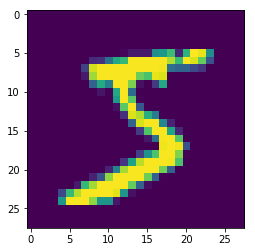

In [22]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [27]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Below network will have convolution block followed by transition block and convolution block.
As MNIST is simple problem, i.e  interms of features, so will try out different channels and track parameters vs accuracy.
Achieved 99.41% with 9,460 parameters.

In [44]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 10)        170       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [46]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.004 * 1/(1 + 0.319 * epoch), 20)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
60000/60000 [==============================] - 11s 190us/step - loss: 0.2102 - acc: 0.9343 - val_loss: 0.0830 - val_acc: 0.9748
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.003032600454890068.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0676 - acc: 0.9787 - val_loss: 0.0596 - val_acc: 0.9808
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.002442002442002442.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0543 - acc: 0.9832 - val_loss: 0.0354 - val_acc: 0.9892
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020439448134900355.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0445 - acc: 0.9859 - val_loss: 0.0292 - val_acc: 0.9899
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.00175

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [48]:
print(score)

[0.021360808435695072, 0.993]


In [0]:
y_pred = model.predict(X_test)

In [34]:
print(y_pred[:9])
print(y_test[:9])

[[9.47058432e-09 1.15297629e-08 1.30252786e-07 1.21260539e-08
  1.31384340e-07 3.05013415e-09 3.76343948e-13 9.99999642e-01
  1.04890574e-09 5.90170437e-08]
 [1.35756181e-07 1.26795931e-06 9.99998450e-01 4.82943026e-11
  2.56714872e-10 2.12002457e-10 1.48993820e-07 3.72887943e-10
  2.35551301e-11 3.08556340e-11]
 [6.80926260e-10 9.99999762e-01 3.29381988e-09 3.25846815e-11
  1.69000600e-08 3.01461789e-08 3.59987817e-09 1.38490321e-07
  5.35071043e-10 2.76914980e-09]
 [9.99993324e-01 1.41670321e-11 1.32706248e-07 8.71948203e-09
  2.54915666e-09 5.18275245e-09 6.25191251e-06 1.44748000e-08
  3.63494124e-08 2.20455277e-07]
 [1.12150907e-10 2.70011924e-09 5.05257017e-11 1.12770492e-12
  9.99960899e-01 6.94935776e-11 3.40900863e-09 1.37817868e-09
  6.03981753e-10 3.90405221e-05]
 [2.72463024e-10 9.99999523e-01 5.32042588e-09 1.17210772e-11
  1.53097162e-08 3.37269022e-08 2.06819406e-09 4.73052381e-07
  1.57992078e-10 6.66379485e-09]
 [9.07053987e-10 2.53373560e-06 3.42811468e-08 1.21336899e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

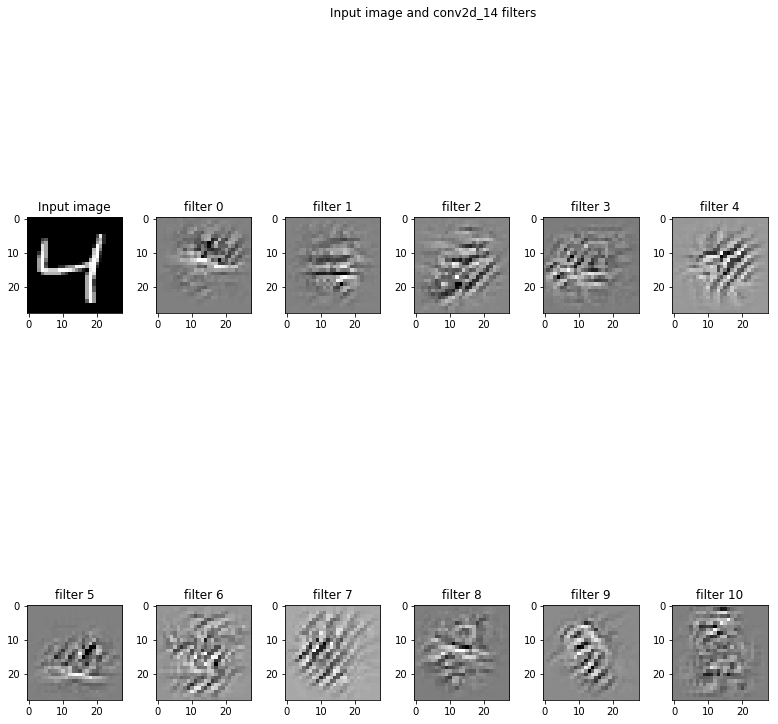

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()